<a href="https://colab.research.google.com/github/purnawanpp/tutorial_gromacs/blob/main/dssp_plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Define Secondary Structure of Proteins (DSSP) Analysis and Frequency Calculation Using GROMACS**


by Purnawan Pontana Putra,
Email: purnawanpp@phar.unand.ac.id
github: https://github.com/purnawanpp/tutorial_gromacs/blob/main/dssp_plot.ipynb



This data.xvg come from command:
*   ***gmx dssp -f md.xtc -s md.tpr -num data.xvg***



gmx dssp allows using the Define Secondary Structure of Proteins.(DSSP) algorithm (namely, by detecting specific patterns of hydrogen bonds between amino acid residues) to determine the secondary structure of a protein. You can easily upload the files dssp.dat and data.xvg to Google Colab to run this script.

<ipython-input-44-c3f9abe157dc>:51: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.


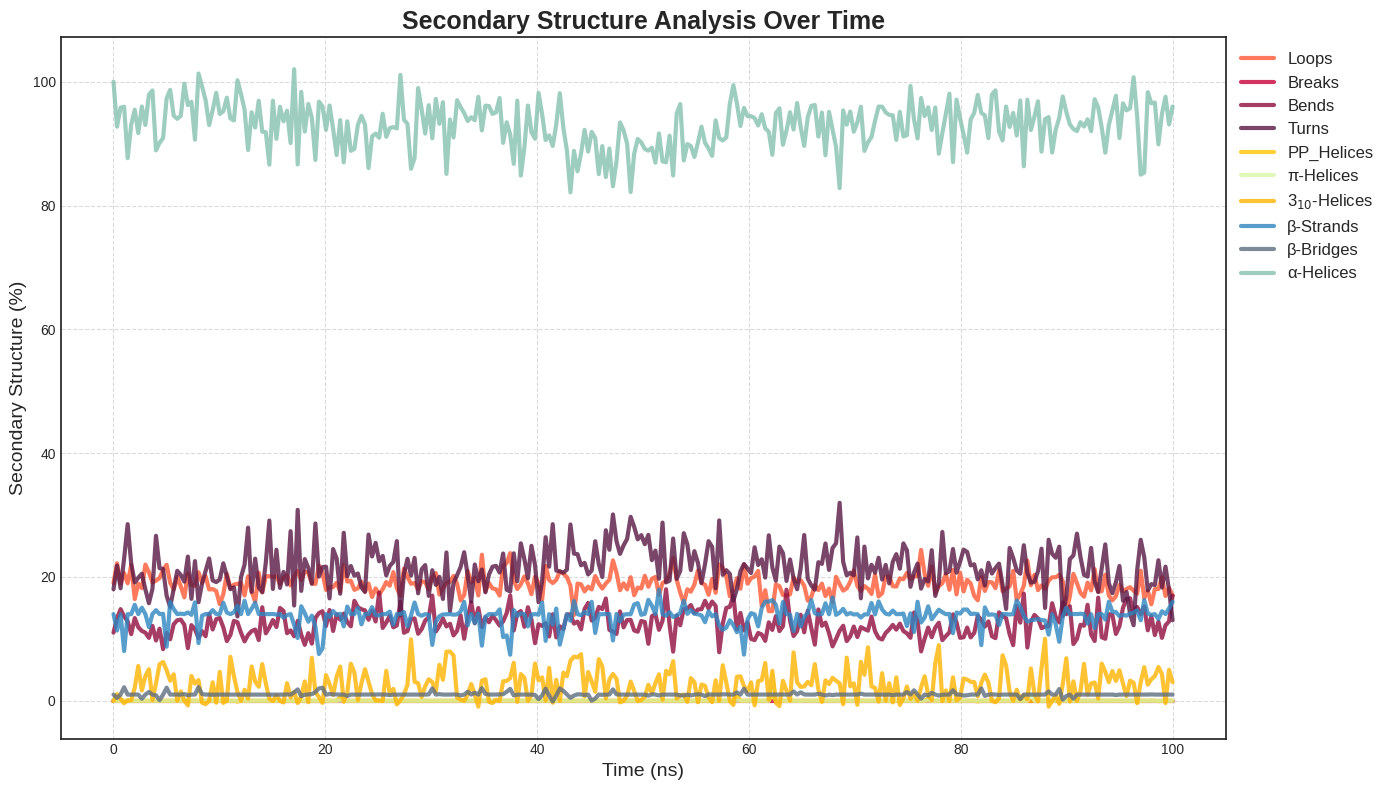

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline

# Assuming 'data.xvg' is the uploaded file
file_name = 'data.xvg'

# Lists to store parsed data
time = []
loops = []
breaks = []
bends = []
turns = []
pp_helices = []
pi_helices = []
three_helix = []
beta_strands = []
beta_bridges = []
alpha_helices = []

# Read through the file to extract necessary data
try:
    with open(file_name, 'r') as file:
        for line in file:
            if line.startswith(('@', '#')):  # Skip metadata lines
                continue
            values = line.split()
            # Ensure we have enough values in the line
            if len(values) >= 11:  # Adjust based on the number of data columns
                try:
                    time.append(float(values[0]) / 1000)  # Convert time from ps to ns
                    loops.append(float(values[1]))          # Loops data
                    breaks.append(float(values[2]))         # Breaks data
                    bends.append(float(values[3]))          # Bends data
                    turns.append(float(values[4]))          # Turns data
                    pp_helices.append(float(values[5]))     # PP_Helices data
                    pi_helices.append(float(values[6]))     # π-Helices data
                    three_helix.append(float(values[7]))    # 3-10 Helices data
                    beta_strands.append(float(values[8]))    # β-Strands data
                    beta_bridges.append(float(values[9]))    # β-Bridges data
                    alpha_helices.append(float(values[10]))  # α-Helices data
                except ValueError:
                    print(f"Warning: Unable to convert values {values} to float.")
except FileNotFoundError:
    print(f"Error: The file '{file_name}' was not found.")
    exit()

# Check if data is present before plotting
if all(len(data) > 0 for data in [time, loops, breaks, bends, turns, pp_helices, pi_helices, three_helix, beta_strands, beta_bridges, alpha_helices]):
    # Set a seaborn style
    plt.style.use('seaborn-white')

    # Create the plot
    plt.figure(figsize=(14, 8))

    # Create smooth lines
    time_smooth = np.linspace(min(time), max(time), 300)  # Generate 300 points for a smooth curve
    loops_smooth = make_interp_spline(time, loops)(time_smooth)
    breaks_smooth = make_interp_spline(time, breaks)(time_smooth)
    bends_smooth = make_interp_spline(time, bends)(time_smooth)
    turns_smooth = make_interp_spline(time, turns)(time_smooth)
    pp_helices_smooth = make_interp_spline(time, pp_helices)(time_smooth)
    pi_helices_smooth = make_interp_spline(time, pi_helices)(time_smooth)
    three_helix_smooth = make_interp_spline(time, three_helix)(time_smooth)
    beta_strands_smooth = make_interp_spline(time, beta_strands)(time_smooth)
    beta_bridges_smooth = make_interp_spline(time, beta_bridges)(time_smooth)
    alpha_helices_smooth = make_interp_spline(time, alpha_helices)(time_smooth)

    # Updated colors for better distinction
    plt.plot(time_smooth, loops_smooth, label='Loops', color='#FF5733', linewidth=3, alpha=0.8)  # Red-Orange
    plt.plot(time_smooth, breaks_smooth, label='Breaks', color='#C70039', linewidth=3, alpha=0.8)  # Crimson
    plt.plot(time_smooth, bends_smooth, label='Bends', color='#900C3F', linewidth=3, alpha=0.8)   # Dark Pink
    plt.plot(time_smooth, turns_smooth, label='Turns', color='#581845', linewidth=3, alpha=0.8)   # Dark Purple
    plt.plot(time_smooth, pp_helices_smooth, label='PP_Helices', color='#FFC300', linewidth=3, alpha=0.8)  # Golden Yellow
    plt.plot(time_smooth, pi_helices_smooth, label='π-Helices', color='#DAF7A6', linewidth=3, alpha=0.8)  # Light Green
    plt.plot(time_smooth, three_helix_smooth, label=r'3$_{10}$-Helices', color='#FFB300', linewidth=3, alpha=0.8)  # Bright Yellow
    plt.plot(time_smooth, beta_strands_smooth, label='β-Strands', color='#2E86C1', linewidth=3, alpha=0.8)  # Sky Blue
    plt.plot(time_smooth, beta_bridges_smooth, label='β-Bridges', color='#5D6D7E', linewidth=3, alpha=0.8)  # Grayish Blue
    plt.plot(time_smooth, alpha_helices_smooth, label='α-Helices', color='#85C1AE', linewidth=3, alpha=0.8)  # Light Blue

    # Add titles and labels
    plt.title('Secondary Structure Analysis Over Time', fontsize=18, fontweight='bold')
    plt.xlabel('Time (ns)', fontsize=14)
    plt.ylabel('Secondary Structure (%)', fontsize=14)

    # Move legend outside the plot
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=12)

    # Show the plot with grid
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()

    # Save the figure as a PNG file with 600 dpi
    plt.savefig('secondary_structure_analysis.png', dpi=600, bbox_inches='tight')

    plt.show()
else:
    print("No data available for plotting.")


**Plot DSSCP with percentages.**

<ipython-input-45-8dba93ab60f0>:63: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.


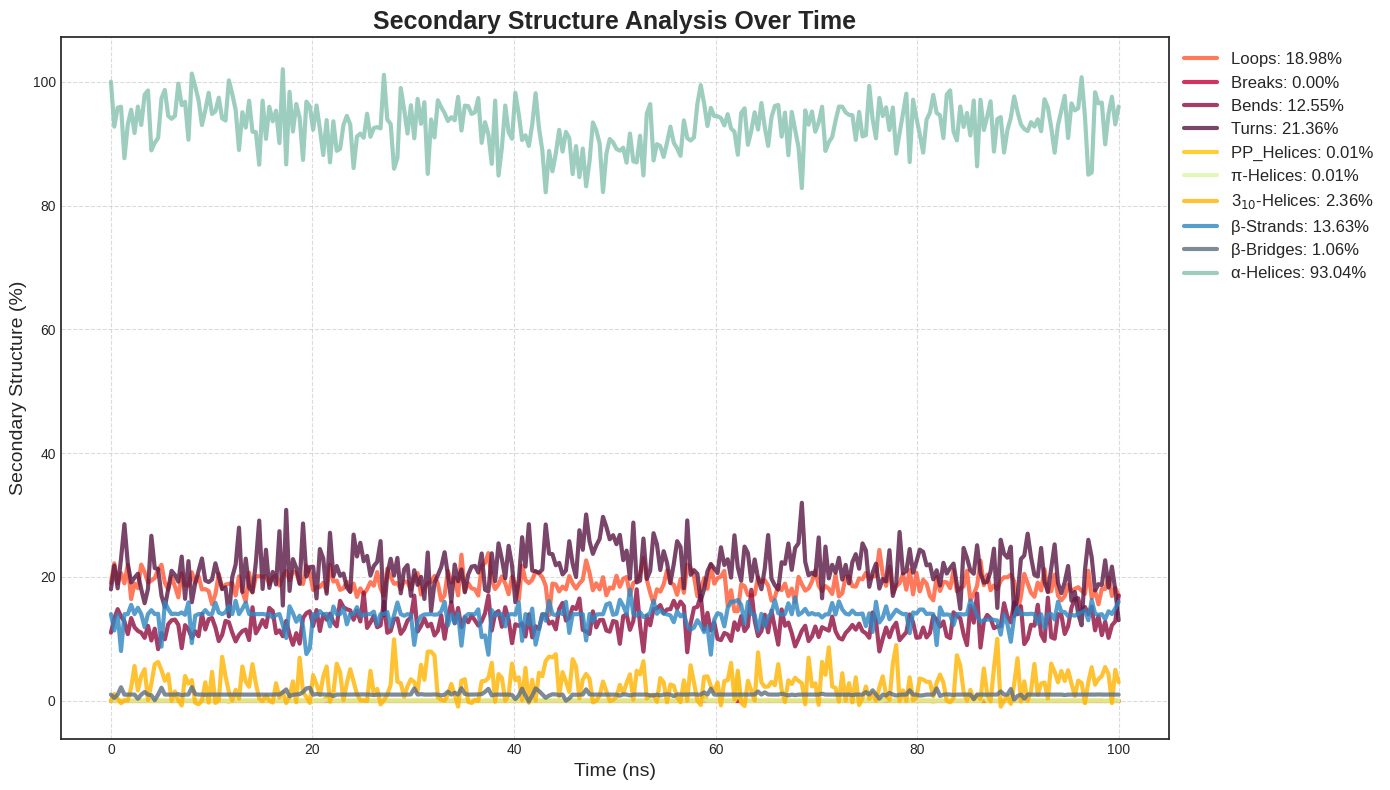

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline

# Assuming 'data.xvg' is the uploaded file
file_name = 'data.xvg'

# Lists to store parsed data
time = []
loops = []
breaks = []
bends = []
turns = []
pp_helices = []
pi_helices = []
three_helix = []
beta_strands = []
beta_bridges = []
alpha_helices = []

# Read through the file to extract necessary data
try:
    with open(file_name, 'r') as file:
        for line in file:
            if line.startswith(('@', '#')):  # Skip metadata lines
                continue
            values = line.split()
            # Ensure we have enough values in the line
            if len(values) >= 11:  # Adjust based on the number of data columns
                try:
                    time.append(float(values[0]) / 1000)  # Convert time from ps to ns
                    loops.append(float(values[1]))          # Loops data
                    breaks.append(float(values[2]))         # Breaks data
                    bends.append(float(values[3]))          # Bends data
                    turns.append(float(values[4]))          # Turns data
                    pp_helices.append(float(values[5]))     # PP_Helices data
                    pi_helices.append(float(values[6]))     # π-Helices data
                    three_helix.append(float(values[7]))    # 3-10 Helices data
                    beta_strands.append(float(values[8]))    # β-Strands data
                    beta_bridges.append(float(values[9]))    # β-Bridges data
                    alpha_helices.append(float(values[10]))  # α-Helices data
                except ValueError:
                    print(f"Warning: Unable to convert values {values} to float.")
except FileNotFoundError:
    print(f"Error: The file '{file_name}' was not found.")
    exit()

# Check if data is present before plotting
if all(len(data) > 0 for data in [time, loops, breaks, bends, turns, pp_helices, pi_helices, three_helix, beta_strands, beta_bridges, alpha_helices]):
    # Calculate averages for percentages
    avg_loops = np.mean(loops)
    avg_breaks = np.mean(breaks)
    avg_bends = np.mean(bends)
    avg_turns = np.mean(turns)
    avg_pp_helices = np.mean(pp_helices)
    avg_pi_helices = np.mean(pi_helices)
    avg_three_helix = np.mean(three_helix)
    avg_beta_strands = np.mean(beta_strands)
    avg_beta_bridges = np.mean(beta_bridges)
    avg_alpha_helices = np.mean(alpha_helices)

    # Set a seaborn style
    plt.style.use('seaborn-white')

    # Create the plot
    plt.figure(figsize=(14, 8))

    # Create smooth lines
    time_smooth = np.linspace(min(time), max(time), 300)  # Generate 300 points for a smooth curve
    loops_smooth = make_interp_spline(time, loops)(time_smooth)
    breaks_smooth = make_interp_spline(time, breaks)(time_smooth)
    bends_smooth = make_interp_spline(time, bends)(time_smooth)
    turns_smooth = make_interp_spline(time, turns)(time_smooth)
    pp_helices_smooth = make_interp_spline(time, pp_helices)(time_smooth)
    pi_helices_smooth = make_interp_spline(time, pi_helices)(time_smooth)
    three_helix_smooth = make_interp_spline(time, three_helix)(time_smooth)
    beta_strands_smooth = make_interp_spline(time, beta_strands)(time_smooth)
    beta_bridges_smooth = make_interp_spline(time, beta_bridges)(time_smooth)
    alpha_helices_smooth = make_interp_spline(time, alpha_helices)(time_smooth)

    # Updated colors for better distinction
    plt.plot(time_smooth, loops_smooth, label=f'Loops: {avg_loops:.2f}%', color='#FF5733', linewidth=3, alpha=0.8)
    plt.plot(time_smooth, breaks_smooth, label=f'Breaks: {avg_breaks:.2f}%', color='#C70039', linewidth=3, alpha=0.8)
    plt.plot(time_smooth, bends_smooth, label=f'Bends: {avg_bends:.2f}%', color='#900C3F', linewidth=3, alpha=0.8)
    plt.plot(time_smooth, turns_smooth, label=f'Turns: {avg_turns:.2f}%', color='#581845', linewidth=3, alpha=0.8)
    plt.plot(time_smooth, pp_helices_smooth, label=f'PP_Helices: {avg_pp_helices:.2f}%', color='#FFC300', linewidth=3, alpha=0.8)
    plt.plot(time_smooth, pi_helices_smooth, label=f'π-Helices: {avg_pi_helices:.2f}%', color='#DAF7A6', linewidth=3, alpha=0.8)
    plt.plot(time_smooth, three_helix_smooth, label=f'3$_{{10}}$-Helices: {avg_three_helix:.2f}%', color='#FFB300', linewidth=3, alpha=0.8)
    plt.plot(time_smooth, beta_strands_smooth, label=f'β-Strands: {avg_beta_strands:.2f}%', color='#2E86C1', linewidth=3, alpha=0.8)
    plt.plot(time_smooth, beta_bridges_smooth, label=f'β-Bridges: {avg_beta_bridges:.2f}%', color='#5D6D7E', linewidth=3, alpha=0.8)
    plt.plot(time_smooth, alpha_helices_smooth, label=f'α-Helices: {avg_alpha_helices:.2f}%', color='#85C1AE', linewidth=3, alpha=0.8)

    # Add titles and labels
    plt.title('Secondary Structure Analysis Over Time', fontsize=18, fontweight='bold')
    plt.xlabel('Time (ns)', fontsize=14)
    plt.ylabel('Secondary Structure (%)', fontsize=14)

    # Move legend outside the plot
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=12)

    # Show the plot with grid
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()

    # Save the figure as a PNG file with 600 dpi
    plt.savefig('secondary_structure_analysis_percentages.png', dpi=600, bbox_inches='tight')

    plt.show()
else:
    print("No data available for plotting.")


**Analysis frequency and residue**

Length of sequences: 163
Number of frames: 10001
Unique elements: ['B', 'E', 'G', 'H', 'I', 'P', 'S', 'T', '~']
Reduced DataFrame:
     0      1          2          3          4          5          6    \
0  Loops  Loops  α-Helices  α-Helices  α-Helices  α-Helices  α-Helices   
1  Loops  Loops  α-Helices  α-Helices  α-Helices  α-Helices  α-Helices   
2  Loops  Loops  α-Helices  α-Helices  α-Helices  α-Helices  α-Helices   
3  Loops  Loops  α-Helices  α-Helices  α-Helices  α-Helices  α-Helices   
4  Loops  Loops  α-Helices  α-Helices  α-Helices  α-Helices  α-Helices   

         7          8          9    ...        153        154    155    156  \
0  α-Helices  α-Helices  α-Helices  ...  α-Helices  α-Helices  Bends  Bends   
1  α-Helices  α-Helices  α-Helices  ...  α-Helices      Bends  Bends  Bends   
2  α-Helices  α-Helices  α-Helices  ...  α-Helices  α-Helices  Bends  Bends   
3  α-Helices  α-Helices  α-Helices  ...  α-Helices  α-Helices  Bends  Bends   
4  α-Helices  α-Helices  α-He

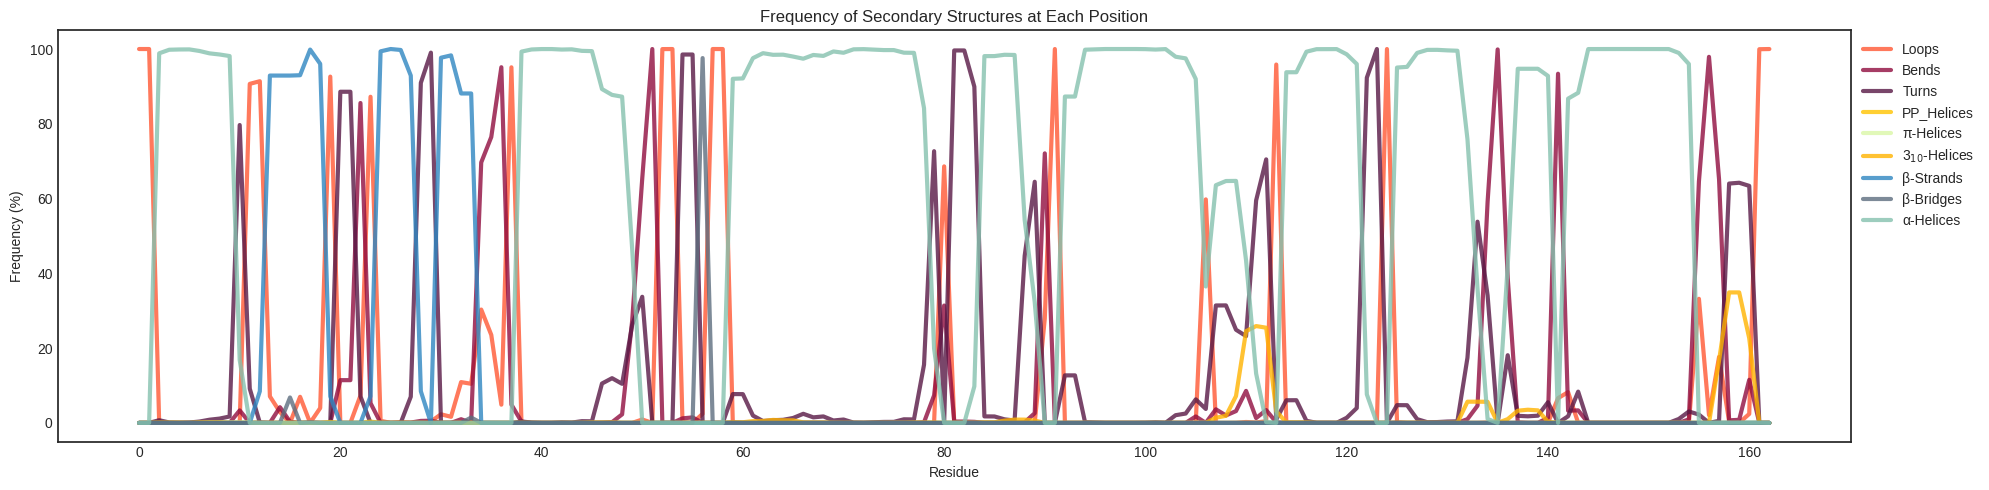

Consensus structure at each position:
     0      1          2          3          4          5          6    \
0  Loops  Loops  α-Helices  α-Helices  α-Helices  α-Helices  α-Helices   

         7          8          9    ...        153        154    155    156  \
0  α-Helices  α-Helices  α-Helices  ...  α-Helices  α-Helices  Bends  Bends   

     157    158    159    160    161    162  
0  Bends  Turns  Turns  Turns  Loops  Loops  

[1 rows x 163 columns]
N consistent positions:  122
N variable positions:  41
Variability at each position:
0      0.000000
1      0.000000
2      0.011499
3      0.001900
4      0.001200
         ...   
158    0.359864
159    0.357664
160    0.366063
161    0.000500
162    0.000000
Length: 163, dtype: float64


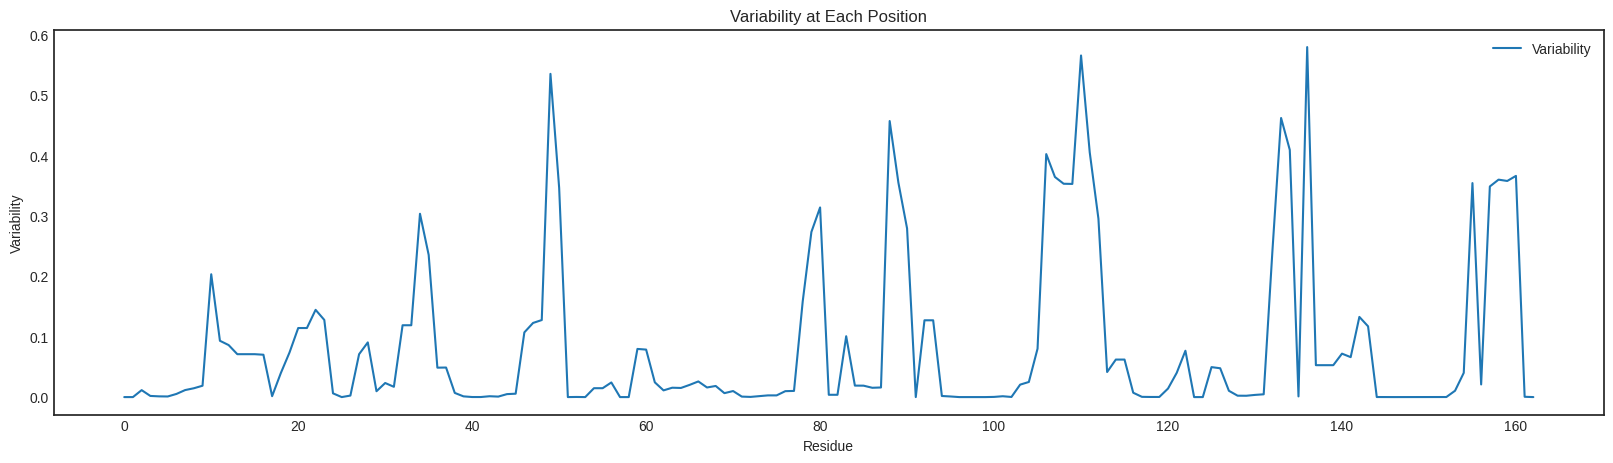

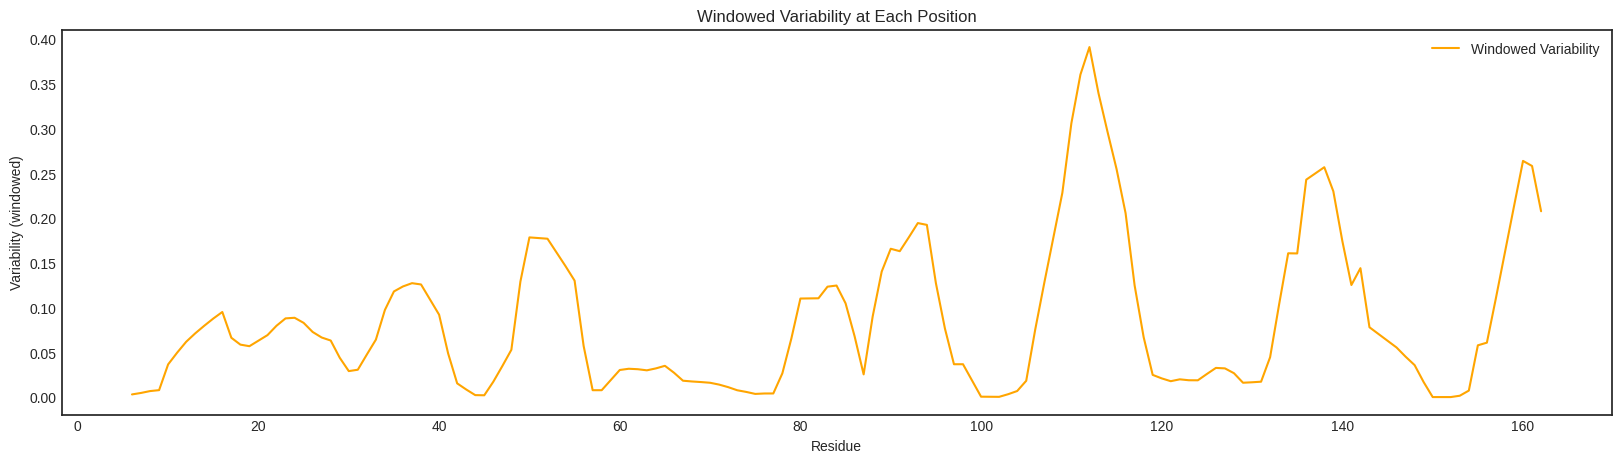

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Read the .dat file from the provided path
file_path = '/content/dssp.dat'  # Adjust to the path of the file you're using
with open(file_path, 'r') as file:
    lines = file.readlines()

# Create a DataFrame from the file content
data = [[char for char in line.strip()] for line in lines]
df = pd.DataFrame.from_records(data)

# Display sequence length and number of frames information
print(f"Length of sequences: {len(df.columns)}")
print(f"Number of frames: {len(df)}")

# Handle None/NaN values by replacing them with an empty string
df_filled = df.fillna('')

# Get unique elements
unique_elements = sorted(set(df_filled.values.flatten()))
print("Unique elements:", unique_elements)

# Replace secondary structure symbols with full descriptions
ss_dict = {
    'H': 'α-Helices',
    'G': '3$_{{10}}$-Helices',
    'I': 'π-Helices',
    'B': 'β-Bridges',
    'E': 'β-Strands',
    'T': 'Turns',
    'S': 'Bends',
    '~': 'Loops',
    'P': 'PP_Helices',
    '=': 'Breaks'
}
df_reduced = df_filled.replace(ss_dict)

# Display the reduced DataFrame
print("Reduced DataFrame:")
print(df_reduced.head())

# Sequence composition
print(df_reduced.iloc[0, :].value_counts())

# Position variation and frequency of each element at each position
position_variation = df_reduced.apply(lambda x: x.value_counts()).fillna(0)

# Convert to percentages
position_variation_percent = (position_variation / len(df)) * 100

# Create a plot for all types of secondary structures in a single image
plt.figure(figsize=(20, 5))

# Ensure the labels used are in the DataFrame
labels = {
    'Loops': '#FF5733',
    'Breaks': '#C70039',
    'Bends': '#900C3F',
    'Turns': '#581845',
    'PP_Helices': '#FFC300',
    'π-Helices': '#DAF7A6',
    '3$_{{10}}$-Helices': '#FFB300',
    'β-Strands': '#2E86C1',
    'β-Bridges': '#5D6D7E',
    'α-Helices': '#85C1AE'
}

# Plot all types of secondary structures with customized labels and colors
for label, color in labels.items():
    if label in position_variation_percent.index:
        plt.plot(position_variation_percent.loc[label, :],
                 label=label, color=color, linewidth=3, alpha=0.8)

# Labels and title
plt.ylabel('Frequency (%)')
plt.title('Frequency of Secondary Structures at Each Position')
plt.xlabel('Residue')

# Move the legend outside the plot, closer to the image
plt.legend(bbox_to_anchor=(1.0, 1), loc='upper left', borderaxespad=0.5)  # Adjust 1.0 to bring it closer
plt.tight_layout()

# Save the plot for all secondary structures
plt.savefig('/content/dssp_residue_frequency.png', dpi=600, bbox_inches='tight')
plt.show()

# Evaluate the secondary structure at each position
consensus = df_reduced.mode(axis=0)
print("Consensus structure at each position:")
print(consensus)

# Threshold for position consistency
threshold = 0.9
consistent_positions = []
variable_positions = []

for position in df_reduced.columns:
    if df_reduced[position].value_counts().max() > threshold * len(df_reduced[position]):
        consistent_positions.append(position)
    else:
        variable_positions.append(position)

print('N consistent positions: ', len(consistent_positions))
print('N variable positions: ', len(variable_positions))

# Calculate variability
variability = 1 - df_reduced.apply(lambda x: x.value_counts(normalize=True).max(), axis=0)
print("Variability at each position:")
print(variability)

# Plot variability
fig, ax = plt.subplots(figsize=(20, 5))
ax.plot(variability, label='Variability')
ax.set_xlabel('Residue')
ax.set_ylabel('Variability')
ax.set_title('Variability at Each Position')
ax.legend()

# Windowed variability
window_size = 7
variability_windowed = variability.rolling(window_size).mean()

# Plot windowed variability
fig, ax = plt.subplots(figsize=(20, 5))
ax.plot(variability_windowed, label='Windowed Variability', color='orange')
ax.set_xlabel('Residue')
ax.set_ylabel('Variability (windowed)')
ax.set_title('Windowed Variability at Each Position')
ax.legend()

# Save the plot of windowed variability
fig.savefig('/content/windowed_variability_percent_fixed.png', dpi=600, bbox_inches='tight')

plt.show()


**Plot time (ns) over residue**

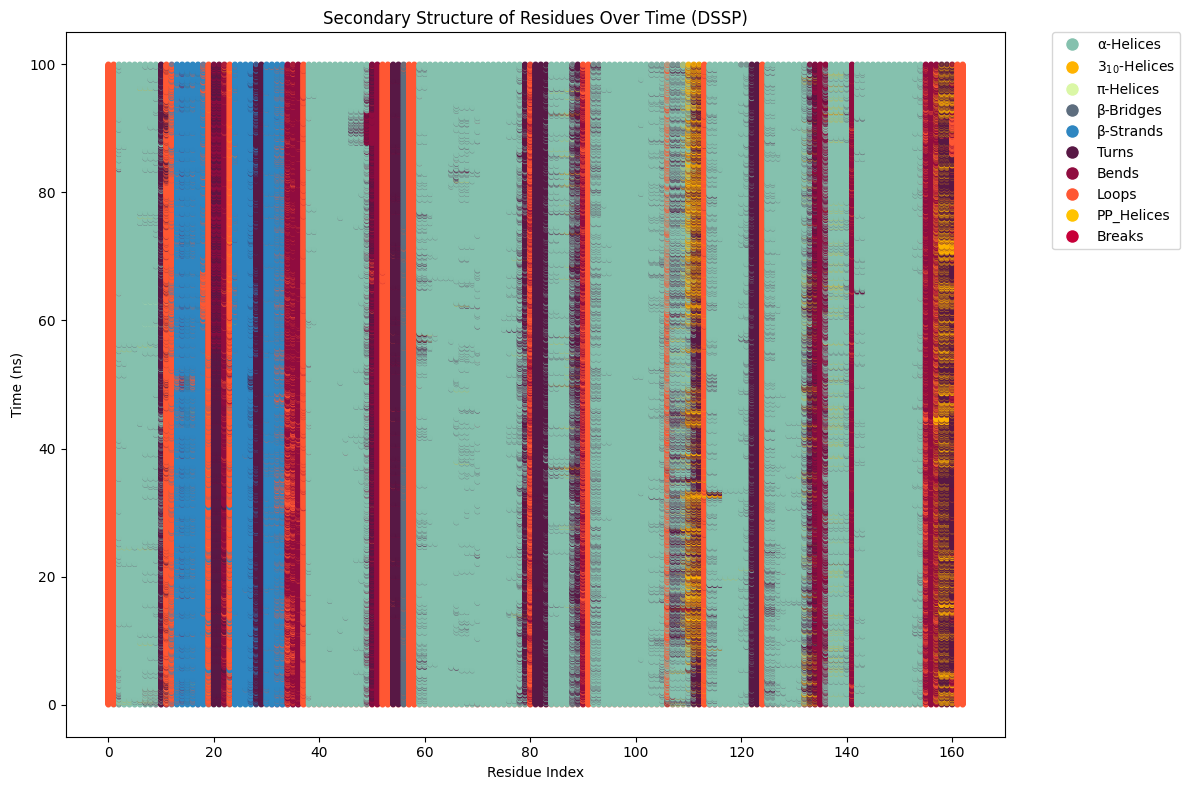

In [ ]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np

# Load DSSP data from the uploaded file
data = []
with open('/content/dssp.dat', 'r') as file:
    for line in file:
        cleaned_line = list(line.strip())  # Read each line as a list of characters
        if len(cleaned_line) > 0:  # Only add non-empty lines
            data.append(cleaned_line)

# Ensure that all rows have the same length (residues count)
# Find the maximum length of any row
max_length = max(len(row) for row in data)

# Pad rows with missing values with a placeholder (e.g., '~' for Loops)
for i in range(len(data)):
    if len(data[i]) < max_length:
        data[i] += ['~'] * (max_length - len(data[i]))

# Convert the data into a NumPy array for easier manipulation
data = np.array(data)

# Get the number of frames and residues from the data
num_frames, num_residues = data.shape  # Number of rows (frames) and columns (residues)

# Define time array (from 0 to 100 ns)
time_ns = np.linspace(0, 100, num_frames)

# Define a dictionary for DSSP symbols and colors with updated color codes
dssp_map = {
    'H': 'α-Helices', 'G': '3$_{{10}}$-Helices', 'I': 'π-Helices',
    'B': 'β-Bridges', 'E': 'β-Strands', 'T': 'Turns',
    'S': 'Bends', '~': 'Loops', 'P': 'PP_Helices', '=': 'Breaks'
}
colors = {
    'H': '#85C1AE',   # α-Helices
    'G': '#FFB300',   # 3$_{{10}}$-Helices
    'I': '#DAF7A6',   # π-Helices
    'B': '#5D6D7E',   # β-Bridges
    'E': '#2E86C1',   # β-Strands
    'T': '#581845',   # Turns
    'S': '#900C3F',   # Bends
    '~': '#FF5733',   # Loops
    'P': '#FFC300',   # PP_Helices
    '=': '#C70039'    # Breaks
}

# Map the symbols to their corresponding colors
color_array = np.vectorize(colors.get)(data)

# Create a figure for the plot
plt.figure(figsize=(12, 8))

# Plot each residue's data over time using a scatter plot
for residue_idx in range(num_residues):
    plt.scatter([residue_idx] * num_frames, time_ns, color=color_array[:, residue_idx], s=10, alpha=0.5)

# Add labels and title
plt.xlabel('Residue Index')
plt.ylabel('Time (ns)')
plt.title('Secondary Structure of Residues Over Time (DSSP)')

# Create a legend
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=dssp_map[symbol])
           for symbol, color in colors.items()]
plt.legend(handles=handles, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

# Save the plot as a PNG file with 600 dpi
plt.savefig('dssp_residue_time.png', dpi=600, bbox_inches='tight')

# Show the plot
plt.tight_layout()
plt.show()


Another colors =


    'H': 'red', 'G': 'blue', 'I': 'green', 'B': 'purple',
    'E': 'yellow', 'T': 'orange', 'S': 'cyan', '~': 'grey',
    'P': 'brown', '=': 'black'